In [1]:
import vdms
import util

db = vdms.vdms()
db.connect("localhost")

In [2]:
blobs = []
fd = open("videos/Megamind.mp4", 'rb')
blobs.append(fd.read())
fd.close()

In [3]:
query = [ {   
    "AddVideo": {
        "properties":{ 
            "name": "megamind_clip"
        }, 
        "codec": "h264",
        "container": "mp4"
    }   
}
]

resp, res_blob = db.query(query, [blobs])
print(resp)

[{'AddVideo': {'status': 0, 'info': ''}}]


In [39]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

[{'FindFrames': {'returned': 1, 'status': 0}}]
First Frame Size: 55.3349609375 KB


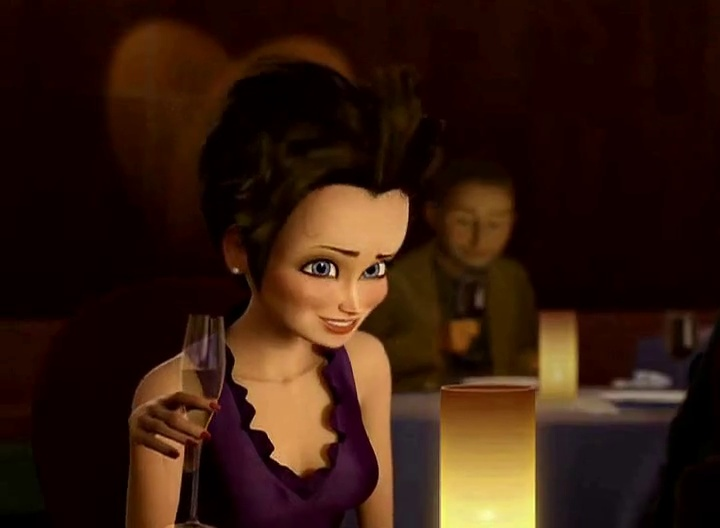

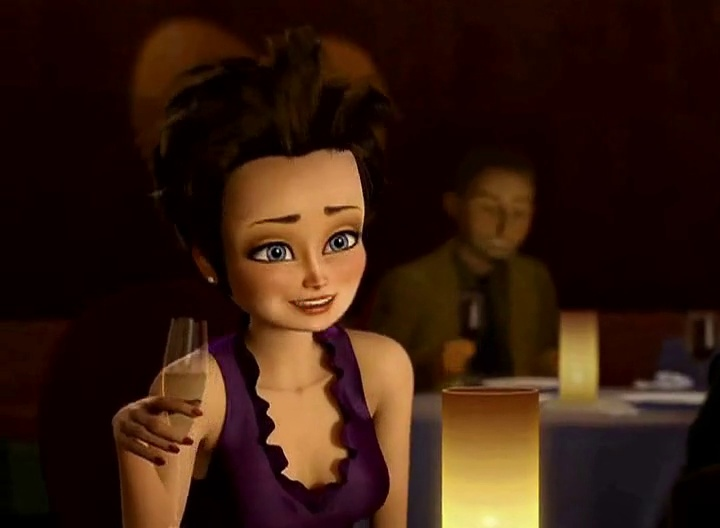

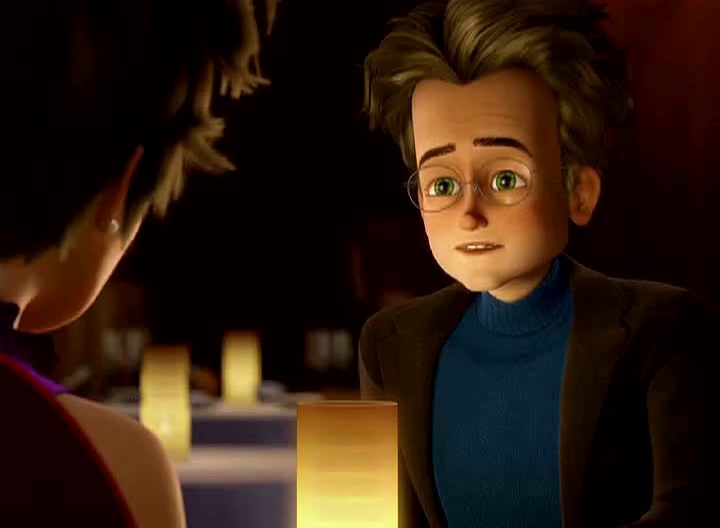

Number of images: 3


In [4]:
qry = [ {
    "FindFrames": {
        "frames": [20, 50, 100],
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "format": "jpg"
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))

[{'FindFrames': {'returned': 1, 'status': 0}}]
First Frame Size: 29.1474609375 KB


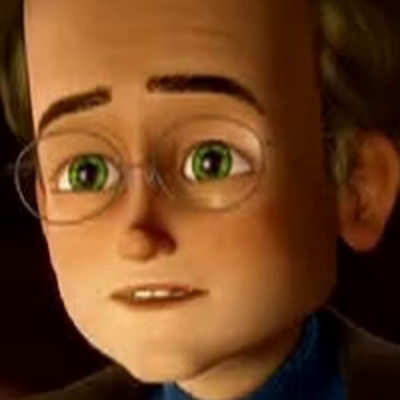

Number of images: 1


In [5]:
qry = [ {
    "FindFrames": {
        "frames": [100],
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "format": "jpg", 
        "operations": [{
            "type": "crop",
            "height": 200,
            "width": 200,
            "x": 400,
            "y": 100
        },{
            "type": "resize",
            "height": 400,
            "width": 400
        }, 
        ]
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))

In [5]:
## Get Videos - return video blobs
qry = [ 
{
    "FindVideo": 
    {
        "results": 
        {
            "list" : ["name"]
        }
    }
}
]

response, blob = db.query(qry)
print(response)
print(len(blob[0])/1024, "KB")

[{'FindVideo': {'entities': [{'name': 'test0'}], 'returned': 1, 'status': 0}}]
7805.6904296875 KB


### FindFrames Interval

In [ ]:
qry = [ {
    "FindFrames": {
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "operations": [
            {
                "type": "interval",
                "start": 0,
                "stop": 5,
                "step": 1
            }
        ],
        "format": "jpg"
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))

In [16]:
import vdms
import util

db = vdms.vdms()
db.connect("localhost")

[{'FindFrames': {'returned': 1, 'status': 0}}]
First Frame Size: 164.6513671875 KB


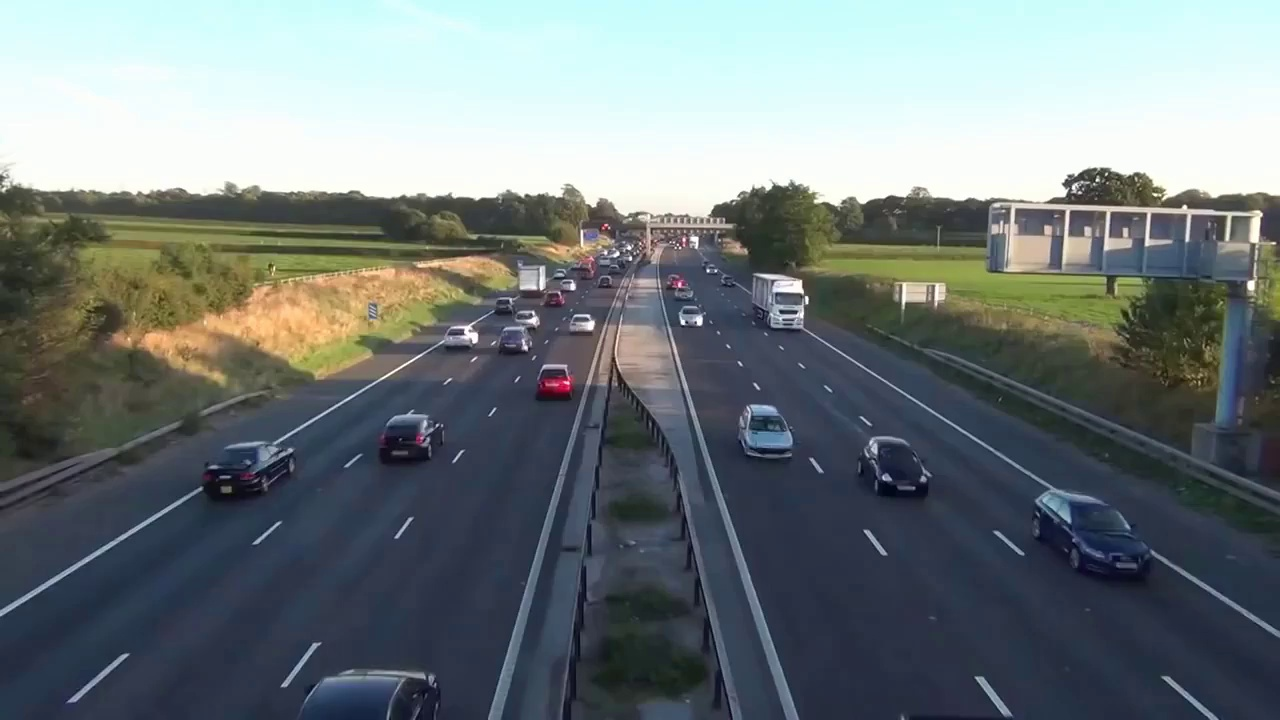

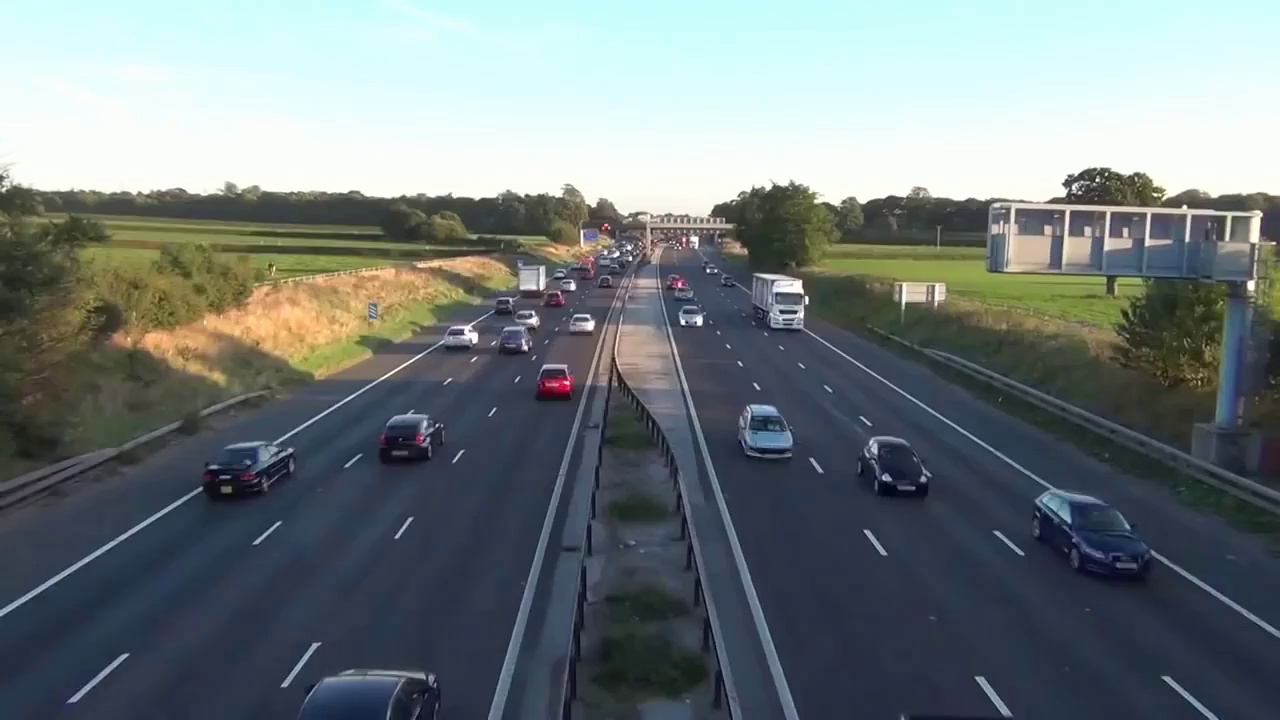

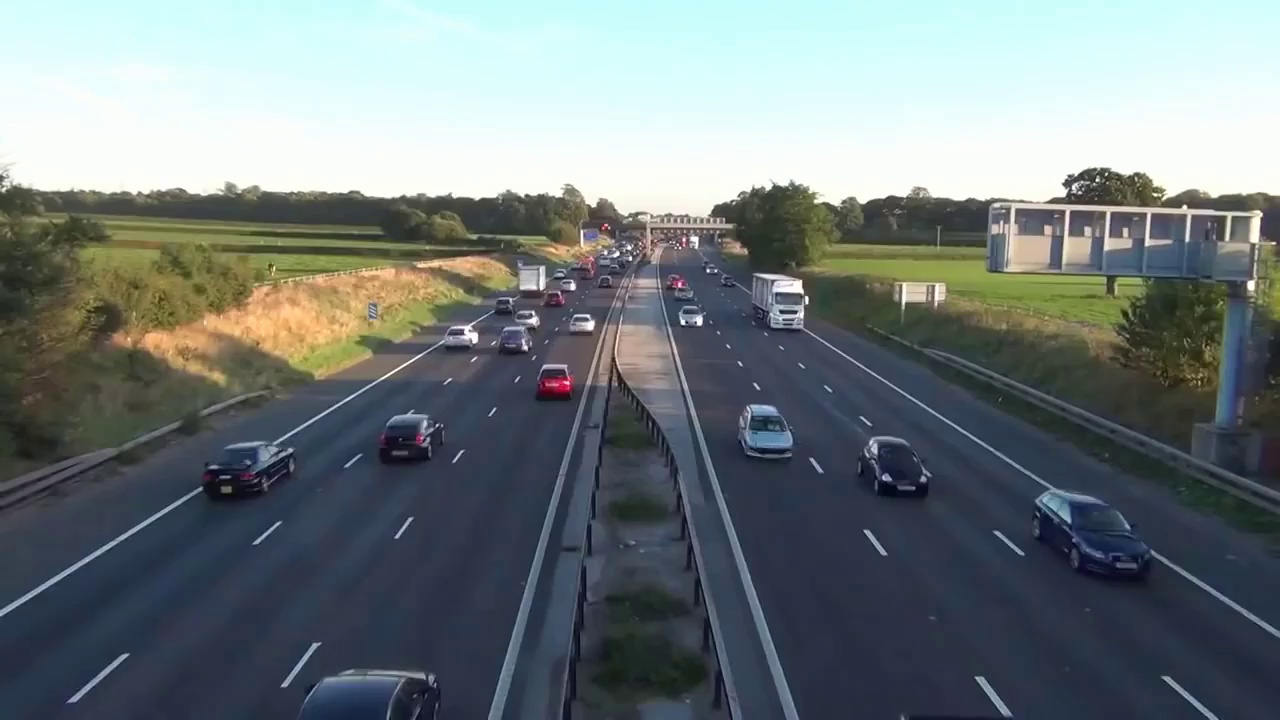

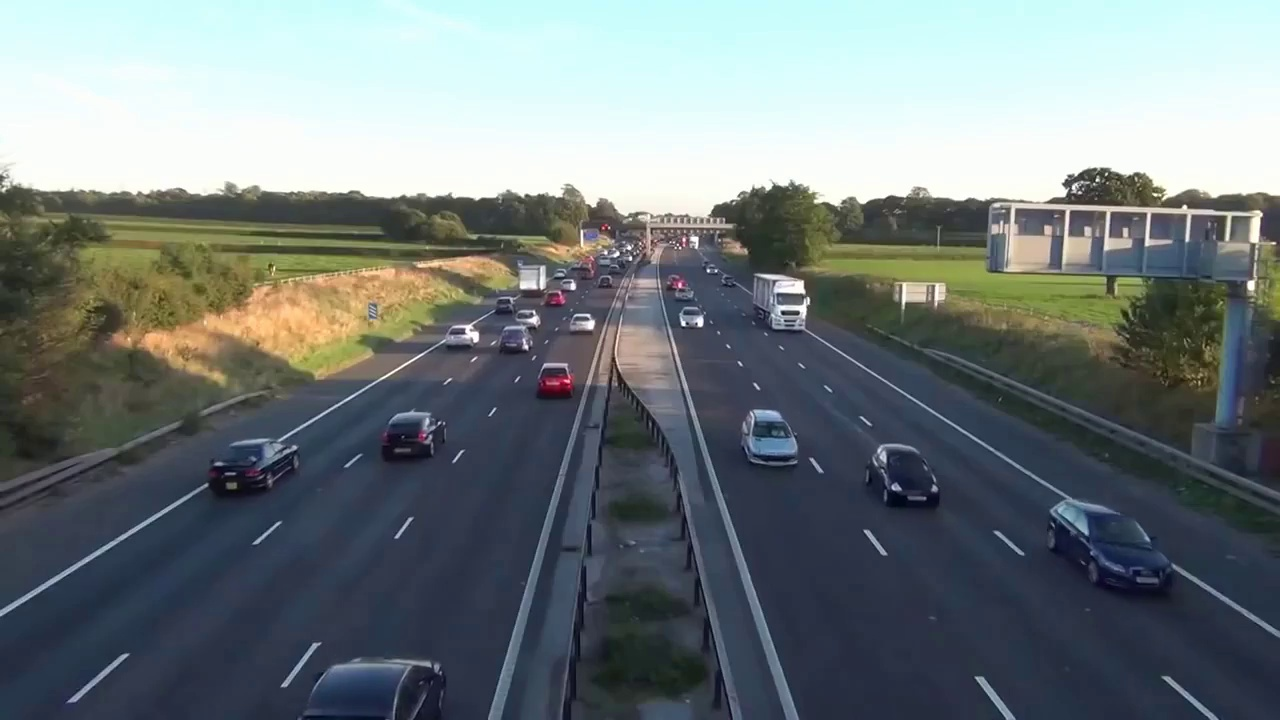

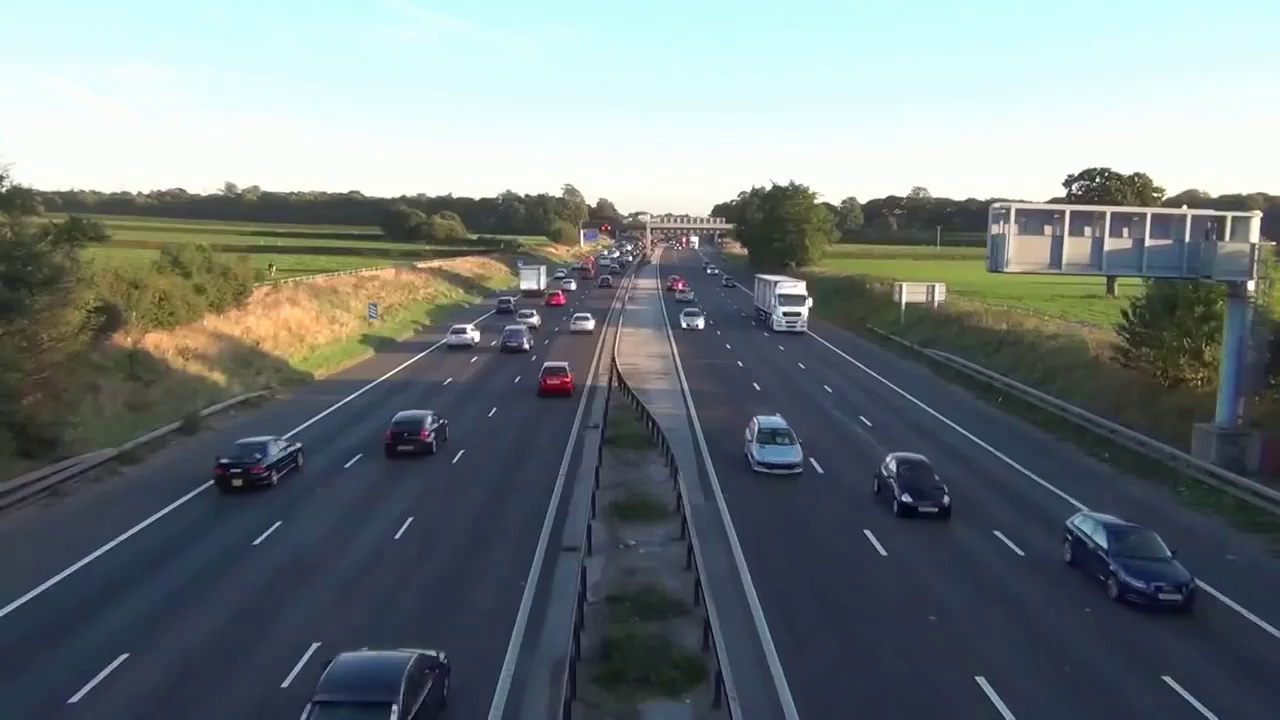

Number of images: 5


In [26]:
qry = [ {
    "FindFrames": {
        "constraints": {
            "name": ["==", "test0"]
        }, 
        "operations": [
            {
                "type": "interval",
                "start": 0,
                "stop": 5,
                "step": 1
            }
        ],
        "format": "jpg"
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))

# FIND VIDEO

In [41]:
qry = [ 
{
    "FindVideo": 
    {
        "constraints": 
        {
            "name": ["==", "megamind_clip"]
        },
        "results": 
        {
            "list" : ["name"]
        }
    }
}
]

response, blob = db.query(qry)
print(response)
print ("Blob is in bit stream")
print("Blob Size:", len(blob)/1024, "KB")
# BUG??

[{'FindVideo': {'entities': [{'name': 'megamind_clip'}], 'returned': 1, 'status': 0}}]
Blob is in bit stream
Blob Size: 0.0009765625 KB


#### Can We get video using find entity? YESS!! filter with class "VD:VID but NO BLOB"

In [24]:
qry = [
   {
      "FindEntity" : {
         "class" : "VD:VID",
         "results" : {
            "list" : [ "name" ]
         }
      }
   }
]

response, blob = db.query(qry)
print(response)
print ("Number of images:", len(blob))

[{'FindEntity': {'entities': [{'name': 'test0'}], 'returned': 1, 'status': 0}}]
Number of images: 0


In [1]:
import vdms
import util

db = vdms.vdms()
db.connect("localhost")

In [2]:
qry = [ {
    "FindFrames": {
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "operations": [
            {
                "type": "interval",
                "start": 0,
                "stop": 110,
                "step": 1
            }
        ]
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")
print("Blob Size:", len(blob[0])/1024*len(blob), "KB")

# util.display_images(blob)    
print ("Number of images:", len(blob))

[{'FindFrames': {'returned': 0, 'status': 0}}]


IndexError: list index out of range

In [3]:
qry = [ {
    "FindFrames": {
        "constraints": {
            "name": ["==", "test0"]
        }, 
        "operations": [
            {
                "type": "interval",
                "start": 0,
                "stop": 21,
                "step": 1
            }
        ]
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")
print("Blob Size:", len(blob[0])/1024*len(blob), "KB")

# util.display_images(blob)    
print ("Number of images:", len(blob))

[{'FindFrames': {'returned': 2, 'status': 0}}]
First Frame Size: 740.9521484375 KB
Blob Size: 31119.990234375 KB
Number of images: 42


In [81]:
qry = [ {
    "FindFrames": {
        "constraints": {
            "name": ["==", "test0"],
            "isFull": ["==", True]
        }, 
        "operations": [
            {
                "type": "interval",
                "start": 0,
                "stop": 10,
                "step": 1
            }
        ]
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")
print("Blob Size:", len(blob[0])/1024*len(blob), "KB")

# util.display_images(blob)    
print ("Number of images:", len(blob))

[{'FindFrames': {'returned': 1, 'status': 0}}]
First Frame Size: 740.9521484375 KB
Blob Size: 7409.521484375 KB
Number of images: 10
